In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGZM0ZH/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGZM0ZH/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGZM0ZH/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**Note:** The convolutional layer has 128 filters, each of which is 5 words long. Remember that we are using words not images, so the filters are one dimensional! Since the input max_length is 120, and the filter size is 5, it will shave off 4 elements from the sides during convolution. Therefore the output dimension is 116, not 120. We still have 128 filters, so that will show up in the last dimension of the convolutional layer.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 47s 119ms/step - loss: 0.4439 - accuracy: 0.7865 - val_loss: 0.3212 - val_accuracy: 0.8732
Epoch 2/10
391/391 [==============================] - 28s 70ms/step - loss: 0.2205 - accuracy: 0.9171 - val_loss: 0.3045 - val_accuracy: 0.8774
Epoch 3/10
391/391 [==============================] - 26s 65ms/step - loss: 0.1687 - accuracy: 0.9392 - val_loss: 0.3396 - val_accuracy: 0.8666
Epoch 4/10
391/391 [==============================] - 24s 61ms/step - loss: 0.1371 - accuracy: 0.9518 - val_loss: 0.3685 - val_accuracy: 0.8624
Epoch 5/10
391/391 [==============================] - 24s 60ms/step - loss: 0.1128 - accuracy: 0.9604 - val_loss: 0.4120 - val_accuracy: 0.8625
Epoch 6/10
391/391 [==============================] - 23s 60ms/step - loss: 0.0902 - accuracy: 0.9698 - val_loss: 0.4961 - val_accuracy: 0.8580
Epoch 7/10
391/391 [==============================] - 22s 57ms/step - loss: 0.0697 - accuracy: 0.9779 - val_loss: 0.5868 - val_accuracy

**Note:** You will almost always have more overfitting with words than images when using convolutions because of OOV words in the validation set.

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

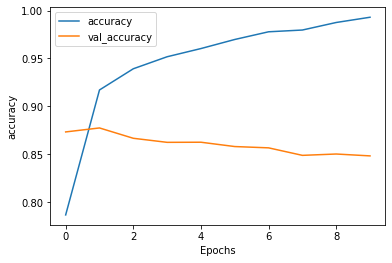

In [11]:
plot_graphs(history, 'accuracy')

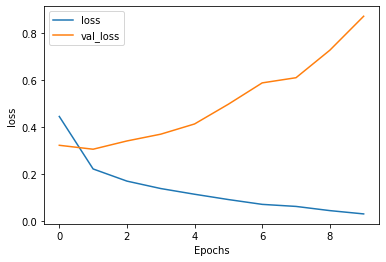

In [12]:
plot_graphs(history, 'loss')